<a href="https://colab.research.google.com/github/hashmiabrar1/Deep-Learning-Hands-on/blob/main/Fully_connected_sequential_model_for_automobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#Automobile data is from the UCI repo
automobile_data= pd.read_csv('Automobile_data.csv', sep=r'\s*,\s*', engine='python')


In [ ]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#Replace and remove nan
import numpy as np

In [ ]:
automobile_data=automobile_data.replace('?', np.nan)

In [ ]:
automobile_data=automobile_data.dropna()

In [ ]:
automobile_data.shape

(159, 26)

In [ ]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [ ]:
col=['make','fuel-type','body-style','horsepower']
automobile_features=automobile_data[col]

In [ ]:
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [ ]:
automobile_target=automobile_data['price']

In [ ]:
pd.options.mode.chained_assignment= None

In [ ]:
#Convert hp to numeric
automobile_features['horsepower']= pd.to_numeric(automobile_features['horsepower'])

In [ ]:
automobile_target.describe()

count      159
unique     145
top       7295
freq         2
Name: price, dtype: object

In [ ]:
#Convert to float
automobile_target=automobile_target.astype(float)

In [ ]:
#One hot encoding is used to assign a numeric value to non_numeric values
automobile_features=pd.get_dummies(automobile_features, columns=['make','fuel-type','body-style'])

In [ ]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn import preprocessing

In [ ]:
#Standardize numeric values i.e by subtracting mean and dividing by std. ML algos work better with such normalized data.
automobile_features[['horsepower']]= preprocessing.scale(automobile_features[['horsepower']])
automobile_features

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,0.201279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.625812,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0.462530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,1.442223,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
10,0.168622,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.593156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
201,2.095352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
202,1.246285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
203,0.331904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [ ]:
automobile_features['horsepower']

3      0.201279
4      0.625812
6      0.462530
8      1.442223
10     0.168622
         ...   
200    0.593156
201    2.095352
202    1.246285
203    0.331904
204    0.593156
Name: horsepower, Length: 159, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test= train_test_split(automobile_features, automobile_target, test_size=0.2, random_state=0)

import torch

In [ ]:
dtype=torch.float

In [ ]:
X_train_tensor= torch.tensor(X_train.values, dtype=dtype)
Y_train_tensor= torch.tensor(Y_train.values, dtype=dtype)

x_test_tensor= torch.tensor(x_test.values, dtype=dtype)
y_test_tensor= torch.tensor(y_test.values, dtype=dtype)

In [ ]:
X_train_tensor.shape

torch.Size([127, 26])

In [ ]:
Y_train_tensor.shape

torch.Size([127, 1])

In [ ]:
Y_train_tensor=Y_train_tensor.reshape(127,1)

In [ ]:
inp=26
out=1
hid=100

loss_fn=torch.nn.MSELoss()

learning_rate=0.0001

In [ ]:
#All Neural Network classes derive from the base torch.nn.Module class
#Sequential allows us to construct neural networks in a sequence. A module can have other modules in a nested structure.
model= torch.nn.Sequential(torch.nn.Linear(inp,hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid,out))

In [ ]:
for iter in range(10000):
  y_pred=model(X_train_tensor)
  loss=loss_fn(y_pred, Y_train_tensor)

  if(iter% 1000)==0:
    print(iter, loss.item())
  model.zero_grad()
  loss.backward()

  with torch.no_grad():
    for param in model.parameters():
      param-=learning_rate * param.grad 

0 168078752.0
1000 4287236.5
2000 2332659.0
3000 1670635.0
4000 1375012.875
5000 1215738.875
6000 1120663.125
7000 1063046.25
8000 1020007.625
9000 983487.5


In [ ]:
sample=x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [ ]:
sample_tensor= torch.tensor(sample.values, dtype= dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [ ]:
y_pred= model(sample_tensor)
print("Predicted price of automobile is :", int(y_pred.item()))
print("Actual price of automobile is: ", int(y_test.iloc[23]))


Predicted price of automobile is : 8095
Actual price of automobile is:  8495


In [ ]:
y_pred_tensor=model(x_test_tensor)

In [ ]:
y_pred=y_pred_tensor.detach().numpy()

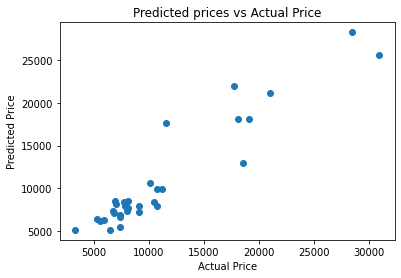

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Predicted prices vs Actual Price")
plt.show()

In [ ]:
torch.save(model, "my_model")

In [ ]:
saved_model=torch.load('my_model')

In [ ]:
y_pred_tensor=saved_model(x_test_tensor)

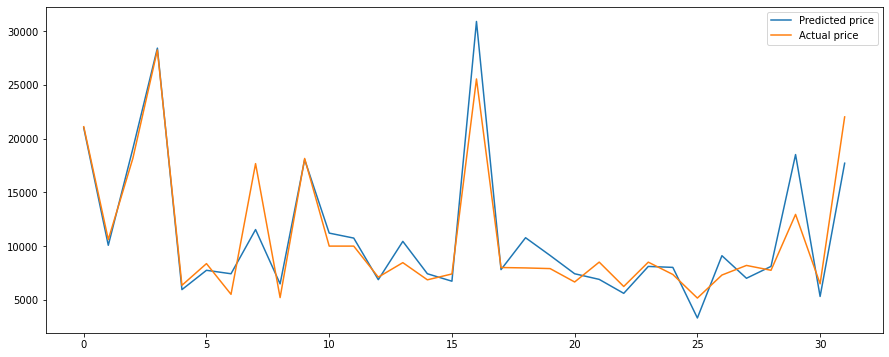

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted price')
plt.plot(y_test.values, label='Actual price')

plt.legend()
plt.show()

# **PYTORCH OPTIMIZATION**
1) Construct Optimizer Object
Pass an iterable of all parameters
Each parameter should be a variable

2) Specify per parameter options
Pass an iterable of dict objects
Each key is a param, defines parameter group

3) Compute gradients
Invoke .backwards()
Using Autograd for reverse auto-differentiation.

4) Take an Optimization Step
Invoke optimizer.step()

torch.optim-
.Optimizer
.Adadelta
.Adagrad
.Adam

SGD Optimizers
Parameters t+1= Parameter t - learning rate * Gradient
Move each parameter value in the direction of reducing gradient

Also Momentum based Optimizers-
Momentum vector helps accelerate in the direction where gradient is decreasing
Faster Convergence
